In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('dataset/YearPredictionMSD.txt', delimiter=',')  # Adjust delimiter if necessary
print(data.head())

# Convert year to decade
data['Decade'] = (data.iloc[:, 0] // 10) * 10

# Split the data
train_data = data.iloc[:463715]
test_data = data.iloc[-51630:]

# Separate features and target for the training data
X_train = train_data.drop(columns=['Decade', train_data.columns[0]])  # Exclude the Year and Decade columns
y_train = train_data['Decade']    # The Decade column

# Separate features and target for the test data
X_test = test_data.drop(columns=['Decade', test_data.columns[0]])    # Exclude the Year and Decade columns
y_test = test_data['Decade']      # The Decade column

# Train Random Forest Regressor
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

# Predict on the training set
y_train_pred = rf.predict(X_train)

# Predict on the test set
y_test_pred = rf.predict(X_test)

# Evaluate the model on the training set
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_rmse = train_mse ** 0.5

print(f'Training Mean Squared Error: {train_mse}')
print(f'Training R² Score: {train_r2}')
print(f'Training Mean Absolute Error: {train_mae}')
print(f'Training Root Mean Squared Error: {train_rmse}')

# Evaluate the model on the test set
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_rmse = test_mse ** 0.5

print(f'Test Mean Squared Error: {test_mse}')
print(f'Test R² Score: {test_r2}')
print(f'Test Mean Absolute Error: {test_mae}')
print(f'Test Root Mean Squared Error: {test_rmse}')

# Plot the actual vs predicted values for the test set
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, alpha=0.5)
plt.plot([min(y_test.min(), y_test_pred.min()), max(y_test.max(), y_test_pred.max())], 
         [min(y_test.min(), y_test_pred.min()), max(y_test.max(), y_test_pred.max())], 'k--', lw=2)
plt.xlabel('Actual Decade')
plt.ylabel('Predicted Decade')
plt.title('Actual vs Predicted Decade')
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'data/YearPredictionMSD.txt'

   2001  49.94357  21.47114  73.07750   8.74861  -17.40628  -13.09905  \
0  2001  48.73215  18.42930  70.32679  12.94636  -10.32437  -24.83777   
1  2001  50.95714  31.85602  55.81851  13.41693   -6.57898  -18.54940   
2  2001  48.24750  -1.89837  36.29772   2.58776    0.97170  -26.21683   
3  2001  50.97020  42.20998  67.09964   8.46791  -15.85279  -16.81409   
4  2001  50.54767   0.31568  92.35066  22.38696  -25.51870  -19.04928   

   -25.01202  -12.23257   7.83089  ...  13.01620  -54.40548  58.99367  \
0    8.76630   -0.92019  18.76548  ...   5.66812  -19.68073  33.04964   
1   -3.27872   -2.35035  16.07017  ...   3.03800   26.05866 -50.92779   
2    5.05097  -10.34124   3.55005  ...  34.57337 -171.70734 -16.96705   
3  -12.48207   -9.37636  12.63699  ...   9.92661  -55.95724  64.92712   
4   20.67345   -5.19943   3.63566  ...   6.59753  -50.69577  26.02574   

   15.37344   1.11144  -23.08793   68.40795  -1.82223  -27.46348   2.26327  
0  42.87836  -9.90378  -32.22788   70.49388  

c:\Users\Funniest Valentine\Projects\School\machine_learning_class\ml\ml_venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Funniest Valentine\Projects\School\machine_learning_class\ml\ml_venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Funniest Valentine\Projects\School\machine_learning_class\ml\ml_venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_

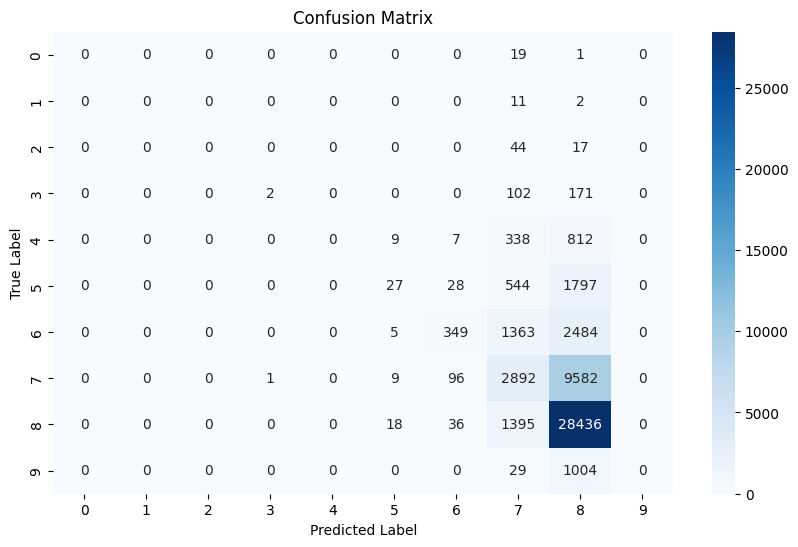

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
data = pd.read_csv('dataset/YearPredictionMSD.txt', delimiter=',')  # Adjust delimiter if necessary
print(data.head())

# Convert year to decade
data['Decade'] = (data.iloc[:, 0] // 10) * 10

# Split the data
train_data = data.iloc[:463715]
test_data = data.iloc[-51630:]

# Separate features and target for the training data
X_train = train_data.drop(columns=['Decade', train_data.columns[0]])  # Exclude the Year and Decade columns
y_train = train_data['Decade']    # The Decade column

# Separate features and target for the test data
X_test = test_data.drop(columns=['Decade', test_data.columns[0]])    # Exclude the Year and Decade columns
y_test = test_data['Decade']      # The Decade column

# Initialize the RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model on the training data
rf_clf.fit(X_train, y_train)

# Predict on the training set
y_train_pred = rf_clf.predict(X_train)

# Predict on the test set
y_test_pred = rf_clf.predict(X_test)

# Evaluate the model on the training set
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f'Training Accuracy: {train_accuracy}')
print('Training Classification Report:')
print(classification_report(y_train, y_train_pred))

# Evaluate the model on the test set
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Test Accuracy: {test_accuracy}')
print('Test Classification Report:')
print(classification_report(y_test, y_test_pred))

# Plot the confusion matrix for the test set
conf_matrix = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

   2001  49.94357  21.47114  73.07750   8.74861  -17.40628  -13.09905  \
0  2001  48.73215  18.42930  70.32679  12.94636  -10.32437  -24.83777   
1  2001  50.95714  31.85602  55.81851  13.41693   -6.57898  -18.54940   
2  2001  48.24750  -1.89837  36.29772   2.58776    0.97170  -26.21683   
3  2001  50.97020  42.20998  67.09964   8.46791  -15.85279  -16.81409   
4  2001  50.54767   0.31568  92.35066  22.38696  -25.51870  -19.04928   

   -25.01202  -12.23257   7.83089  ...  13.01620  -54.40548  58.99367  \
0    8.76630   -0.92019  18.76548  ...   5.66812  -19.68073  33.04964   
1   -3.27872   -2.35035  16.07017  ...   3.03800   26.05866 -50.92779   
2    5.05097  -10.34124   3.55005  ...  34.57337 -171.70734 -16.96705   
3  -12.48207   -9.37636  12.63699  ...   9.92661  -55.95724  64.92712   
4   20.67345   -5.19943   3.63566  ...   6.59753  -50.69577  26.02574   

   15.37344   1.11144  -23.08793   68.40795  -1.82223  -27.46348   2.26327  
0  42.87836  -9.90378  -32.22788   70.49388  

c:\Users\Funniest Valentine\Projects\School\machine_learning_class\ml\ml_venv\Lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Training Accuracy: 1.0
Training Classification Report:
              precision    recall  f1-score   support

        1920       1.00      1.00      1.00        44
        1930       1.00      1.00      1.00        52
        1940       1.00      1.00      1.00        72
        1950       1.00      1.00      1.00       679
        1960       1.00      1.00      1.00      2614
        1970       1.00      1.00      1.00      5563
        1980       1.00      1.00      1.00      9401
        1990       1.00      1.00      1.00     28225
        2000       1.00      1.00      1.00     67161
        2010       1.00      1.00      1.00      2117

    accuracy                           1.00    115928
   macro avg       1.00      1.00      1.00    115928
weighted avg       1.00      1.00      1.00    115928

Test Accuracy: 0.6120666279294984
Test Classification Report:
              precision    recall  f1-score   support

        1920       0.00      0.00      0.00        20
        1930   

c:\Users\Funniest Valentine\Projects\School\machine_learning_class\ml\ml_venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Funniest Valentine\Projects\School\machine_learning_class\ml\ml_venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Funniest Valentine\Projects\School\machine_learning_class\ml\ml_venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_

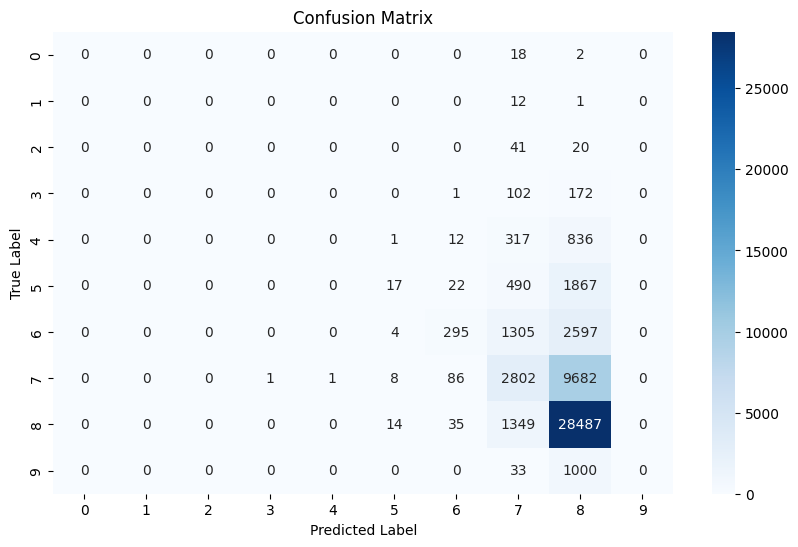

In [9]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
data = pd.read_csv('dataset/YearPredictionMSD.txt', delimiter=',')
print(data.head())

# Convert year to decade
data['Decade'] = (data.iloc[:, 0] // 10) * 10

# Split the data
train_data = data.iloc[:463715]
test_data = data.iloc[-51630:]

# Separate features and target for the training data
X_train_full = train_data.drop(columns=['Decade', train_data.columns[0]])  # Exclude the Year and Decade columns
y_train_full = train_data['Decade']    # The Decade column

# Separate features and target for the test data
X_test = test_data.drop(columns=['Decade', test_data.columns[0]])    # Exclude the Year and Decade columns
y_test = test_data['Decade']      # The Decade column

# Reduce the training dataset size to 1/4
X_train, _, y_train, _ = train_test_split(X_train_full, y_train_full, test_size=0.75, random_state=42)

# Initialize the RandomForestClassifier
rf_clf = RandomForestClassifier(random_state=42)

# Define the hyperparameter grid
param_dist = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=rf_clf, param_distributions=param_dist, 
                                   n_iter=50, cv=3, verbose=2, random_state=42, n_jobs=-1)

# Fit RandomizedSearchCV to the training data
random_search.fit(X_train, y_train)

# Get the best estimator
best_rf_clf = random_search.best_estimator_

# Predict on the training set
y_train_pred = best_rf_clf.predict(X_train)

# Predict on the test set
y_test_pred = best_rf_clf.predict(X_test)

# Evaluate the model on the training set
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f'Training Accuracy: {train_accuracy}')
print('Training Classification Report:')
print(classification_report(y_train, y_train_pred))

# Evaluate the model on the test set
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Test Accuracy: {test_accuracy}')
print('Test Classification Report:')
print(classification_report(y_test, y_test_pred))

# Plot the confusion matrix for the test set
conf_matrix = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [10]:
best_rf_clf

RandomForestClassifier(bootstrap=False, max_depth=30, random_state=42)

   2001  49.94357  21.47114  73.07750   8.74861  -17.40628  -13.09905  \
0  2001  48.73215  18.42930  70.32679  12.94636  -10.32437  -24.83777   
1  2001  50.95714  31.85602  55.81851  13.41693   -6.57898  -18.54940   
2  2001  48.24750  -1.89837  36.29772   2.58776    0.97170  -26.21683   
3  2001  50.97020  42.20998  67.09964   8.46791  -15.85279  -16.81409   
4  2001  50.54767   0.31568  92.35066  22.38696  -25.51870  -19.04928   

   -25.01202  -12.23257   7.83089  ...  13.01620  -54.40548  58.99367  \
0    8.76630   -0.92019  18.76548  ...   5.66812  -19.68073  33.04964   
1   -3.27872   -2.35035  16.07017  ...   3.03800   26.05866 -50.92779   
2    5.05097  -10.34124   3.55005  ...  34.57337 -171.70734 -16.96705   
3  -12.48207   -9.37636  12.63699  ...   9.92661  -55.95724  64.92712   
4   20.67345   -5.19943   3.63566  ...   6.59753  -50.69577  26.02574   

   15.37344   1.11144  -23.08793   68.40795  -1.82223  -27.46348   2.26327  
0  42.87836  -9.90378  -32.22788   70.49388  

c:\Users\Funniest Valentine\Projects\School\machine_learning_class\ml\ml_venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Funniest Valentine\Projects\School\machine_learning_class\ml\ml_venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Funniest Valentine\Projects\School\machine_learning_class\ml\ml_venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_

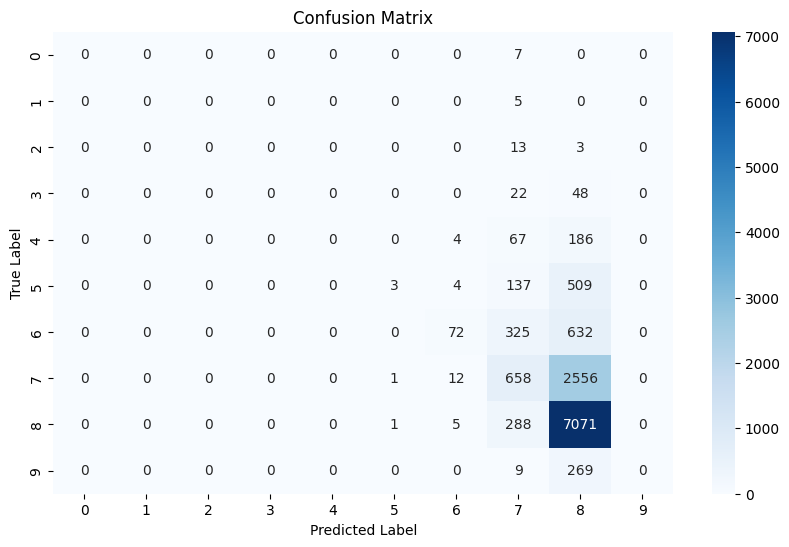

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load the data
data = pd.read_csv('dataset/YearPredictionMSD.txt', delimiter=',')
print(data.head())

# Convert year to decade
data['Decade'] = (data.iloc[:, 0] // 10) * 10

# Split the data
train_data = data.iloc[:463715]
test_data = data.iloc[-51630:]

# Separate features and target for the training data
X_train_full = train_data.drop(columns=['Decade', train_data.columns[0]])  # Exclude the Year and Decade columns
y_train_full = train_data['Decade']    # The Decade column

# Separate features and target for the test data
X_test_full = test_data.drop(columns=['Decade', test_data.columns[0]])    # Exclude the Year and Decade columns
y_test_full = test_data['Decade']      # The Decade column

# Reduce the training dataset size to 1/4
X_train, _, y_train, _ = train_test_split(X_train_full, y_train_full, test_size=0.75, random_state=42)

# Reduce the test dataset size to 1/4
X_test, _, y_test, _ = train_test_split(X_test_full, y_test_full, test_size=0.75, random_state=42)

# Initialize the RandomForestClassifier
rf_clf = RandomForestClassifier(random_state=42)

# Define the expanded hyperparameter grid
param_dist = {
    'n_estimators': [50, 100, 200, 300, 400],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4, 6],
    'bootstrap': [True, False]
}

# Initialize RandomizedSearchCV with increased iterations
random_search = RandomizedSearchCV(estimator=rf_clf, param_distributions=param_dist, 
                                   n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1)

# Fit RandomizedSearchCV to the training data
random_search.fit(X_train, y_train)

# Get the best estimator
best_rf_clf = random_search.best_estimator_

# Print the best parameters
print("Best Parameters found by RandomizedSearchCV:")
print(random_search.best_params_)

# Predict on the training set
y_train_pred = best_rf_clf.predict(X_train)

# Predict on the test set
y_test_pred = best_rf_clf.predict(X_test)

# Evaluate the model on the training set
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f'Training Accuracy: {train_accuracy}')
print('Training Classification Report:')
print(classification_report(y_train, y_train_pred))

# Evaluate the model on the test set
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Test Accuracy: {test_accuracy}')
print('Test Classification Report:')
print(classification_report(y_test, y_test_pred))

# Plot the confusion matrix for the test set
conf_matrix = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
{'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 30, 'bootstrap': False}